## Question 3: ACME Corp

Baseline: 32 quotes out of 595 viewers  
Variation 1: 30 quotes out of 599 viewers  
Variation 2: 18 quotes out of 622 viewers  
Variation 3: 51 quotes out of 606 viewers  
Variation 4: 38 quotes out of 578 viewers  

### What's your interpretation of these results?

Let's assume Baseline is the control group and following are our Experimental Groups:

- Variation 1
- Variation 2
- Variation 3
- Variation 4

Some other assumptions we will be making:

1. Our **Null Hypothesis** states that the Experimental results result in a better Click Through Rate (CTR) than our existing model.
2. We will use a 95% confidence level on a two-tail test. Assuming a Binomial distribution as x, the number of clicks is greater than 5.
3. We will assume Business wants a minimum 2% improvement over the current model.

We first import all the modules and setup our data.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
data = [{'Bucket':'Baseline','Quotes':32,'Views':595},
        {'Bucket':'Variation 1','Quotes':30,'Views':599},
        {'Bucket':'Variation 2','Quotes':18,'Views':622},
        {'Bucket':'Variation 3','Quotes':51,'Views':606},
        {'Bucket':'Variation 4','Quotes':38,'Views':578}]

df = pd.DataFrame(data).set_index(['Bucket'])

Next we calculate the following for each variation:

1. Pooled Probability: Probability of the experimental and baseline model
2. Pooled Standard Error: Standard error for the experimental and baseline model
3. Estimated Difference: Difference between experimental and baseline model
4. Margin Error: Margin error using a z-score for 95% two-tail confidence level
5. Lower & Upper Boundaries for the estimated difference 

In [70]:
z = 1.96 # 95% Confidence level for a 2-tail test
min_diff = 0.02 # Assume minimum 2% significance level for click through

df['Pooled Probability'] = (df.Quotes + 32) / (df.Views + 595)
df['Pooled SE'] = (df['Pooled Probability']*
                   (1-df['Pooled Probability'])*(1/595 + 1/df.Views))**0.5
df['Estimated Diff'] = (df.Quotes/df.Views) - (32/595)
df['Margin Err'] = df['Pooled SE'] * z
df['Lower Bnd'] = df['Estimated Diff'] - df['Margin Err']
df['Upper Bnd'] = df['Estimated Diff'] + df['Margin Err']

In [71]:
df

,Quotes,Views,Pooled Probability,Pooled SE,Estimated Diff,Margin Err,Lower Bnd,Upper Bnd
Bucket,,,,,,,,
Baseline,32,595,0.053782,0.013079,0.000000,0.025634,-0.025634,0.025634
Variation 1,30,599,0.051926,0.012842,-0.003698,0.025171,-0.028869,0.021473
Variation 2,18,622,0.041085,0.011382,-0.024843,0.022309,-0.047151,-0.002534
Variation 3,51,606,0.069109,0.014638,0.030377,0.028691,0.001686,0.059068
Variation 4,38,578,0.059676,0.013835,0.011962,0.027116,-0.015153,0.039078


Let's go ahead and plot this out.

In [73]:
df.dtypes

Quotes                  int64
Views                   int64
Pooled Probability    float64
Pooled SE             float64
Estimated Diff        float64
Margin Err            float64
Lower Bnd             float64
Upper Bnd             float64
dtype: object

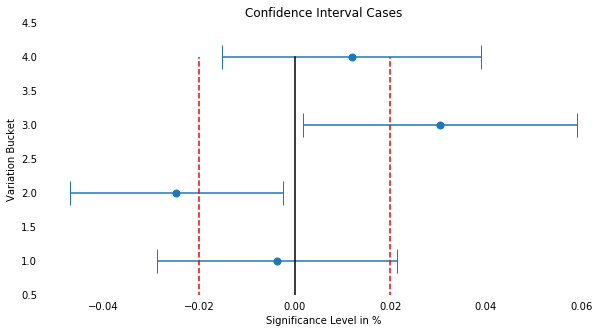

In [186]:
plt.figure(figsize=(10,5))
y = range(5)
num = [-0.02,0.02,0]
w = [num[0]] * 5
z = [num[1]] * 5
v = [num[2]] * 5
e = list(df['Margin Err'])
plt.errorbar('Estimated Diff',y, xerr=e, capsize=12, fmt='-o',markersize=7, data=df, linestyle='None')
plt.plot(w,y, 'r--')
plt.plot(z,y, 'r--')
plt.plot(v,y, 'k')
plt.xlabel('Significance Level in %')
plt.ylabel('Variation Bucket')
plt.ylim(0.5,4.5)
plt.title('Confidence Interval Cases')
plt.tick_params(bottom="off", top="off", left="off", right="off")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.show()

From the above plot it can clearly be seen that one of the experimental variation, does infact meet our 2% improvement requirement. Based on this, we can proceed to **Reject the Null Hypothesis.**

### What conclusions would you draw?

Looking at all the 4 varaitions we can conclude that only **Variation 3** has an estimated difference above our positive significance level. Although our lower boundary comes closer to our original model (i.e. zero estimated difference), it can be estimated with a 95% confidence level that this Variation will perform better than our baseline model.  

We should look to gather additional data by runing an additional test on Variation 4 and eliminate Variations 1 & 2.

### What questions would you ask me about my goals and methodology? Do you have any thoughts on the experimental design? 

What is the desired value for the practical significance level you had in mind for the Variations?  
Was the data collected for the same kind of category?  
Were the visitor counts unique? Using Click Through Probability is more reliable to calculate conversion rates  
Was the data collected during normal business hours and on the same weekdays? People tend to view things on Friday and push them out to Monday, these could be later converts for the views.  
Were these requests sent in the same format and medium? e.g text, email etc. 
Was this data collected withing a restricted time period? Incase the data collection was cut off while some quotes were being submitted?  
Increasing the sample size per variation will enable a higher confidence level.